<a href="https://colab.research.google.com/github/Lakshya-13-04/Census-Income-Prediction/blob/main/Census_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving census-income (1).csv to census-income (1) (2).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
census = pd.read_csv('census-income (1).csv')

##  **Performing Exploratory Data Analysis (EDA) for find key insights**

In [5]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#Checking the no. total of rows and columns
census.shape

(32561, 15)

In [7]:
#Checking the information about dataset
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Checking the data types of each column
census.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [9]:
census['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [10]:
# Checking For the null values
census.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [11]:
# Cheking For the duplicates
census.duplicated().sum()

np.int64(24)

In [12]:
# droping the duplicate Values
census.drop_duplicates(inplace= True)

In [13]:
census.shape

(32537, 15)

In [14]:
# Checking the Statictcal Values of Data (Mean, mode,Meadian, coreelation, standard deviation ,etc.)

census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
# Cheking the unique Values of each Column
census['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [16]:
census['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302])

In [17]:
census['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [18]:
census['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [19]:
census['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

In [20]:
census['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [21]:
census['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [22]:
census['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

#### **Note:** Since we can see that in object data type column there are some '?' in it which doesnot make any sense to be present. So we are replacing the ? with null value.

In [23]:
census = census.replace('?', np.nan)

In [24]:
# Again checking for the nulll values
census.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [25]:
# droping the null values
census.dropna(inplace= True)

In [26]:
# Checking the shape of data set after deleting the null values
census.shape

(30139, 15)

In [27]:
census.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [28]:
df = census[(census['occupation'] == 'Tech-support') & (census['annual_income'] > '50k')]
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
42,24,Private,172987,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,<=50K
55,43,Private,237993,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
64,29,Private,105598,Some-college,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,58,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32396,56,Private,135458,HS-grad,9,Divorced,Tech-support,Not-in-family,Black,Female,0,0,40,United-States,<=50K
32457,33,Private,139057,Masters,14,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,Male,0,0,50,United-States,>50K
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [29]:
census['annual_income'].value_counts()

,count
annual_income,
<=50K,22633
>50K,7506


In [30]:
df2 = census[(census['workclass'] == 'Private') & (census['native-country'] != 'United-States')]
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
35,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32508,45,Private,155093,10th,6,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,<=50K
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K


In [31]:
df1 = census[(census['annual_income'] <= '<=50k') & (census['hours-per-week'] >= 40)]
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32550,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [32]:
census['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [33]:
df1 = census[(census['workclass'] == 'Private') & (census['native-country'] != 'United-States')]

In [34]:
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
35,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32508,45,Private,155093,10th,6,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,<=50K
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K


#### **Vizulaizing the Data For Outlier Detection**

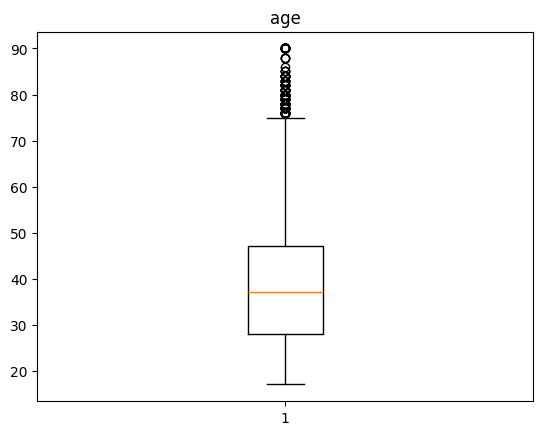

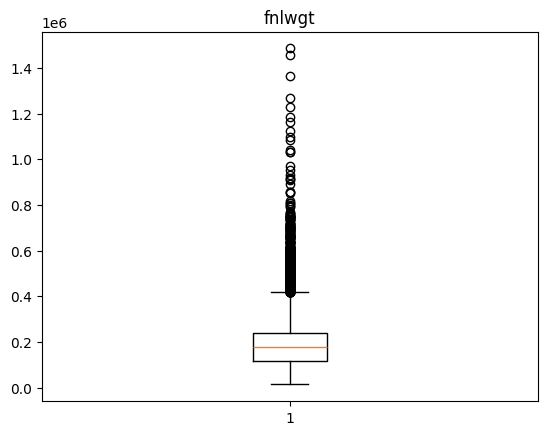

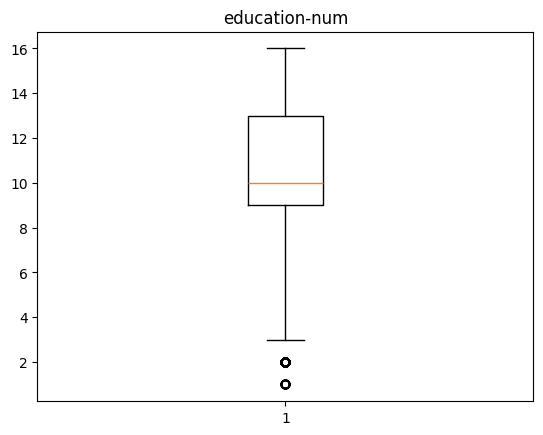

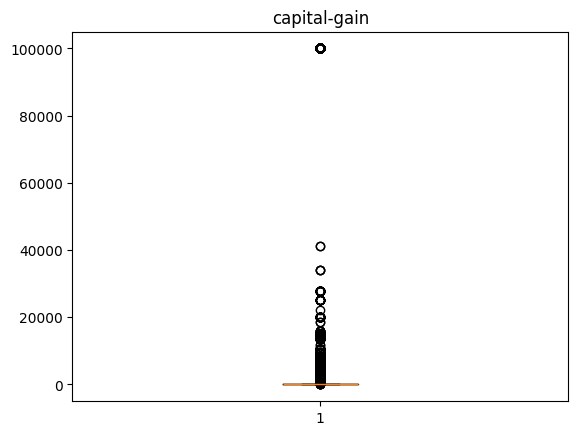

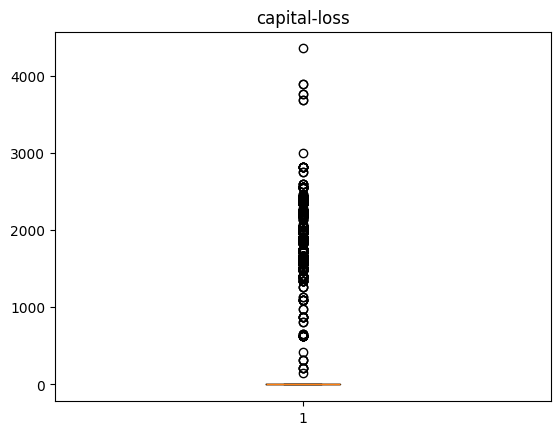

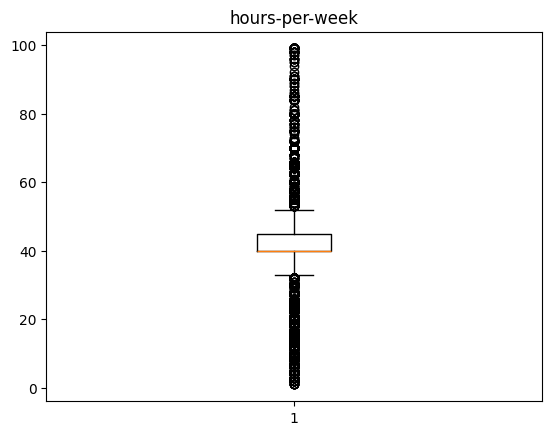

In [35]:
for x in census.columns:
  if census[x].dtypes != 'object':
    plt.boxplot(census[x])
    plt.title(x)
    plt.show()

In [36]:
outliers_list = ['age', 'fnlwgt', 'education-num','hours-per-week']

#### **Removing the outliers with IQR method**

In [37]:
census_filter = census.copy()

for x in outliers_list:
  Q1 = census[x].quantile(0.25)
  Q3 = census[x].quantile(0.75)

  IQR = Q3- Q1

  upper_fence = Q3 + 1.5*IQR
  lower_fence = Q1 - 1.5*IQR

# Capping the Data
  census_filter[x] = np.where(census[x] > upper_fence, upper_fence ,
                           np.where(
                               census[x] < lower_fence, lower_fence, census[x]
                           ))

census_filter.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [38]:
print(f'Q3: {Q3}')
print(f'Q1: {Q1}')
print(f'IQR: {IQR}')
print(f'upper_fence: {upper_fence}')
print(f'lower_fence: {lower_fence}')

Q3: 45.0
Q1: 40.0
IQR: 5.0
upper_fence: 52.5
lower_fence: 32.5


<Axes: xlabel='age', ylabel='Density'>

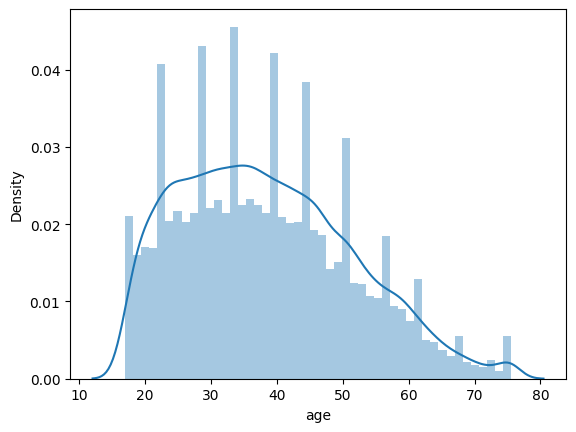

In [39]:
sns.distplot(census_filter['age'])

In [40]:
# Checking the corelation between columns
coree = census_filter.corr(numeric_only= True)

<Axes: >

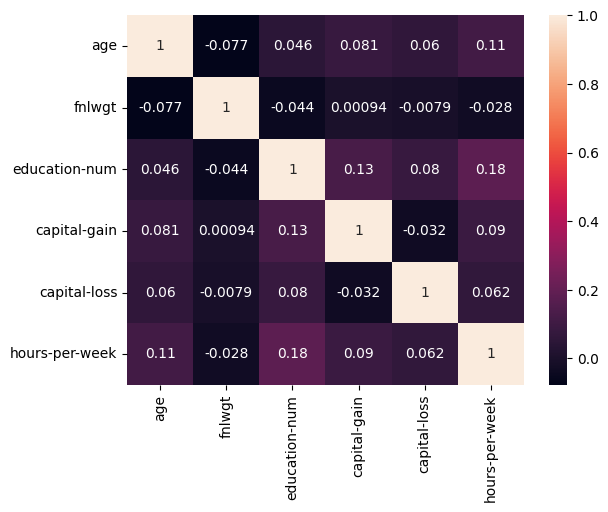

In [41]:
sns.heatmap(coree, annot= True)

In [42]:
census_filter.shape

(30139, 15)

## **Applying machine learning algorithms to predict the response variable**

### **Label Encoding**

#### Label Encoding is use for converting categorical column into numeric column

In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [44]:
census_filter['annual_income'] = census_filter['annual_income'].map({'<=50K' : 0, '>50K' : 1})

In [45]:
le = LabelEncoder()

In [46]:
for x in census_filter.columns:
  if census_filter[x].dtypes == 'object':
    census_filter[x] =le.fit_transform(census_filter[x])

In [47]:
census_filter.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39.0,5,77516.0,9,13.0,4,0,1,4,1,2174,0,40.0,38,0
1,50.0,4,83311.0,9,13.0,2,3,0,4,1,0,0,32.5,38,0
2,38.0,2,215646.0,11,9.0,0,5,1,4,1,0,0,40.0,38,0
3,53.0,2,234721.0,1,7.0,2,5,0,2,1,0,0,40.0,38,0
4,28.0,2,338409.0,9,13.0,2,9,5,2,0,0,0,40.0,4,0


### **spliting The Data**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score

In [49]:
# Creating the variables
X = census_filter.drop(columns='annual_income')
y = census_filter['annual_income']

In [50]:
# Spliting the data into training data and testing data
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y ,random_state= 23)

#### **Model Building**

### **Logistic Regression Model**

In [51]:
# Importing Libararies
from sklearn.linear_model import LogisticRegression

In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
# Applying Logistic Regresion
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [54]:
# calculating the predicted values
y_pred = log_reg.predict(X_test)

In [55]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
# Checking for accuracy_score
accuracy_score(y_test, y_pred)

0.8171864631718646

In [57]:
# checking the Confusion matrix
cm = confusion_matrix(y_pred,y_test)

In [58]:
cm

array([[4231,  806],
       [ 296,  695]])

In [59]:
# checking The F1 Score
f1_score(y_test, y_pred)

0.557784911717496

In [60]:
precision_score(y_test, y_pred, pos_label=0)

0.8399841175302759

### **Descision Tree Model**

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
y_pred = DT_model.predict(X_test)

In [64]:
DT_accuracy = accuracy_score(y_test, y_pred)
DT_accuracy

0.807564698075647

In [65]:
DT_cm = confusion_matrix(y_test, y_pred)
DT_cm

array([[3911,  616],
       [ 544,  957]])

In [66]:
DT_f1_score = f1_score(y_test, y_pred)
DT_f1_score

0.6226415094339622

In [67]:
DT_precision_score = precision_score(y_test, y_pred)
DT_precision_score

0.6083916083916084

### **Random Forest Model**

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
y_pred = RF_model.predict(X_test)

In [71]:
RF_accuracy = accuracy_score(y_test, y_pred)
RF_accuracy

0.8497013934970139

In [72]:
RF_cm = confusion_matrix(y_test, y_pred)
RF_cm

array([[4174,  353],
       [ 553,  948]])

In [73]:
RF_F1_score = f1_score(y_test, y_pred)
RF_F1_score

0.6766595289079229

In [74]:
RF_precision_score = precision_score(y_test, y_pred)
RF_precision_score

0.7286702536510377

#### Out of these 3 three algorithim Random Forest is giving the Highest accuracy of 84.97%